In [ ]:
# Checkout www.pygimli.org for more examples



# Field data inversion ("Koenigsee")

This minimalistic example shows how to use the Refraction Manager to invert
a field data set. Here, we consider the Koenigsee data set, which represents
classical refraction seismics data set with slightly heterogeneous overburden
and some high-velocity bedrock. The data file can be found in the [pyGIMLi
example data repository](https://github.com/gimli-org/example-data/blob/master/traveltime/koenigsee.sgt).


In [1]:
#Install the library
!pip install pygimli

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.9/485.9 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 46.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.2/166.2 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.9/421.9 kB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 743.8/743.8 kB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 50.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 48.0 MB/s eta 0:00:00


In [2]:
# We import pyGIMLi and the traveltime module.

import matplotlib.pyplot as plt
import pygimli as pg
import pygimli.physics.traveltime as tt

The helper function `pg.getExampleData` downloads the data set to a temporary
location and loads it. Printing the data reveals that there are 714 data
points using 63 sensors (shots and geophones) with the data columns s (shot),
g (geophone), and t (traveltime). By default, there is also a validity flag.



In [6]:
data = pg.getExampleData("traveltime/koenigsee.sgt", verbose=True)
print(data)

INFO:pyGIMLi:Looking for traveltime/koenigsee.sgt in gimli-org/example-data/
22/07/24 - 16:47:47 - pyGIMLi - INFO - Looking for traveltime/koenigsee.sgt in gimli-org/example-data/
INFO:pyGIMLi:File already exists: /root/.cache/pygimli/example-data/gimli-org/example-data/master/traveltime/koenigsee.sgt
22/07/24 - 16:47:47 - pyGIMLi - INFO - File already exists: /root/.cache/pygimli/example-data/gimli-org/example-data/master/traveltime/koenigsee.sgt
INFO:pyGIMLi:Reading /root/.cache/pygimli/example-data/gimli-org/example-data/master/traveltime/koenigsee.sgt (<function load at 0x79d5495a32e0>)
22/07/24 - 16:47:47 - pyGIMLi - INFO - Reading /root/.cache/pygimli/example-data/gimli-org/example-data/master/traveltime/koenigsee.sgt (<function load at 0x79d5495a32e0>)


Data: Sensors: 63 data: 714, nonzero entries: ['g', 's', 't', 'valid']


Let's have a look at the data in the form of traveltime curves.



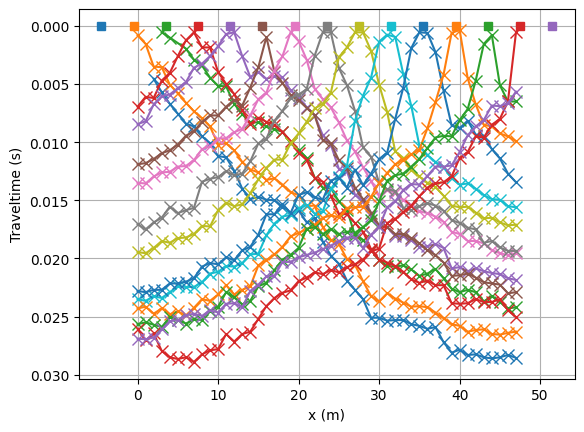

In [7]:
fig, ax = plt.subplots()
lines = tt.drawFirstPicks(ax, data)

We initialize the refraction manager.



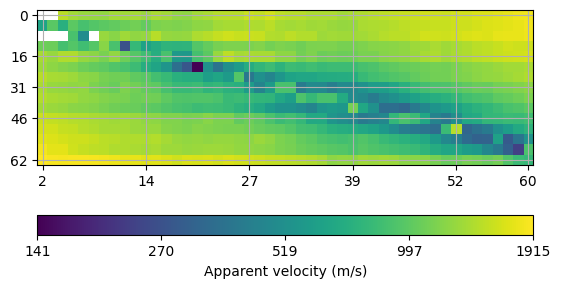

In [5]:
mgr = tt.TravelTimeManager(data)

# Alternatively, one can plot a matrix plot of apparent velocities which is the
# more general function also making sense for crosshole data.

ax, cbar = mgr.showData()

Finally, we call the `invert` method and plot the result.The mesh is created
based on the sensor positions on-the-fly.



In [31]:
mgr.invert(lam=30, lambdaFactor = 0.9, verbose = True, secNodes = 5,paraMaxCellSize=2.0, zWeight=0.3, vTop=500, vBottom=6000, dPhi=0.05)

ERROR:pyGIMLi:<class 'pygimli.physics.traveltime.TravelTimeManager.TravelTimeManager'>.checkError(TravelTimeManager.py:98)
DataContainer has no "err" values. Fallback to 3%
22/07/24 - 19:21:28 - pyGIMLi - ERROR - <class 'pygimli.physics.traveltime.TravelTimeManager.TravelTimeManager'>.checkError(TravelTimeManager.py:98)
DataContainer has no "err" values. Fallback to 3%
INFO:pyGIMLi:Create gradient starting model. 500: 6000
22/07/24 - 19:21:28 - pyGIMLi - INFO - Create gradient starting model. 500: 6000
INFO:pyGIMLi:Created startmodel from forward operator: 1307, min/max=0.000167/0.002000
22/07/24 - 19:21:28 - pyGIMLi - INFO - Created startmodel from forward operator: 1307, min/max=0.000167/0.002000
INFO:pyGIMLi:Starting inversion.
22/07/24 - 19:21:28 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.traveltime.modelling.TravelTimeDijkstraModelling object at 0x79d548dc8180>
Data transformation: <pgcore.libs._pygimli_.RTrans object at 0x79d548d01580>
Model transformation (cumulative):
	 0 <pgcore.libs._pygimli_.RTransLogLU object at 0x79d53fda2b20>
min/max (data): 3.5e-04/0.03
min/max (error): 3%/3%
min/max (start model): 1.7e-04/0.002
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  112.45
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   10.84 (dPhi = 89.17%) lam: 30.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    8.32 (dPhi = 23.62%) lam: 27.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    6.28 (dPhi = 24.35%) lam: 24.3
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    5.60 (dPh

1307 [893.00816286643,...,3926.962608078885]

Look at the fit between measured (crosses) and modelled (lines) traveltimes.



In [25]:
mgr.inv.absrms()

0.000710791709872975

In [16]:
mgr.inv.chi2()

3.3794839697381835

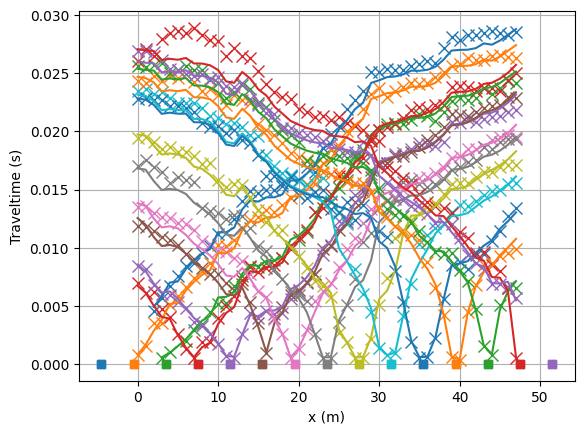

In [32]:
mgr.showFit(firstPicks=True)

You can plot only the model and customize with a bunch of keywords



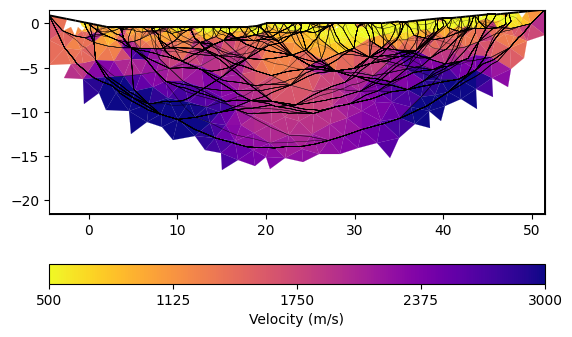

In [33]:
ax, cbar = mgr.showResult(logScale=False, cMin=500, cMax=3000, cMap="plasma_r",
                          coverage=mgr.standardizedCoverage())
rays = mgr.drawRayPaths(ax=ax, color="k", lw=0.3, alpha=0.5)

# mgr.coverage() yields the ray coverage in m and standardizedCoverage as 0/1

You can play around with the gradient starting model (`vTop` and `vBottom`
arguments) and the regularization strength `lam` and customize the mesh.

